### Importación de Tensorflow

In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importación de datos 

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("input/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.


URLError: <urlopen error [WinError 10060] Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder>

### verificando los datos de prueba

In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
imagendemo=np.reshape(mnist.train.images[2,:],(28,28))

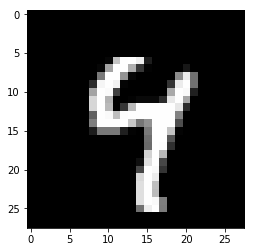

In [0]:
plt.imshow(imagendemo,cmap='gray')

### Declarando la arquitectura

Generando función 

In [0]:
def Neural_network_model(
   
    batch_size=100,
    n_classes=10
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[batch_size,784])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 28, 28, 1])
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64]))
              }

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64]))
             }
   
    
    
    # Declarando la arquitectura
    
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,2,2,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    
    #14*14*32
    
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,2,2,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    
    #7*7*64
    
    weigthsDE = {'dconv1':tf.Variable(tf.random_normal([5,5,32,64])),
               'dconv2':tf.Variable(tf.random_normal([5,5,1,32]))
              }

    biasesDE = {'dconv1':tf.Variable(tf.random_normal([32])),
              'dconv2':tf.Variable(tf.random_normal([1]))
             }
    
    dconv0=tf.nn.conv2d_transpose(l2,weigthsDE['dconv1'],tf.constant([batch_size,14,14,32]),strides=[1,2,2,1])
    dconv0=tf.nn.relu(dconv0+biasesDE['dconv1'])
        #imagen resultante de 14x14x32
    
    dconv1=tf.nn.conv2d_transpose(dconv0,weigthsDE['dconv2'],tf.constant([batch_size,28,28,1]),strides=[1,2,2,1])
    dconv1=tf.nn.relu(dconv1+biasesDE['dconv2'])
        #imagen resultante de 28x28x1

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean(tf.squared_difference(dconv1,img))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    return dict(
              x=x,
              y=y,
              output=dconv1,
              cost=cost,
              optimizer=optimizer
              )

In [0]:
Neural_network_model()

{'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'output': <tf.Tensor 'Relu_3:0' shape=(100, 28, 28, 1) dtype=float32>,
 'x': <tf.Tensor 'Placeholder:0' shape=(100, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>}

In [0]:
def train_neural_network(DNN, hm_epochs=10,batch_size=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        #correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        #accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        #print('Accuracy:',accuracy.eval({DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels}))
    return prediction

In [0]:
DNN=Neural_network_model(batch_size=100)
Example=train_neural_network(DNN,batch_size=100,hm_epochs=200)

Epoch 0 completed out of 200 loss: 87276056.6213
Epoch 1 completed out of 200 loss: 72873.6164045
Epoch 2 completed out of 200 loss: 10290.0517708
Epoch 3 completed out of 200 loss: 3547.66121854
Epoch 4 completed out of 200 loss: 1647.21831639
Epoch 5 completed out of 200 loss: 880.251596652
Epoch 6 completed out of 200 loss: 516.710309014
Epoch 7 completed out of 200 loss: 329.23394978
Epoch 8 completed out of 200 loss: 224.475470498
Epoch 9 completed out of 200 loss: 163.78302902
Epoch 10 completed out of 200 loss: 127.706402779
Epoch 11 completed out of 200 loss: 104.817655623
Epoch 12 completed out of 200 loss: 89.4826966524
Epoch 13 completed out of 200 loss: 79.2401509434
Epoch 14 completed out of 200 loss: 72.6835028157
Epoch 15 completed out of 200 loss: 68.5292327181
Epoch 16 completed out of 200 loss: 66.0289625898
Epoch 17 completed out of 200 loss: 64.3936117813
Epoch 18 completed out of 200 loss: 63.3181528598
Epoch 19 completed out of 200 loss: 62.6231715158
Epoch 20 com